# Logistic Regression

In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [6]:
# Load the dataset
df1 = pd.read_csv('F:\Harshal\dataset\Modified Dataset\HeartDisease_clean.csv')

In [7]:
# Scale the numerical variables
scaler = StandardScaler()
numerical_col = ['age', 'trestbps', 'chol', 'thalach']
df1[numerical_col] = scaler.fit_transform(df1[numerical_col])

In [8]:
# Apply Label Encoding on Ordinal Categorical Variables
le = LabelEncoder()
df1['cp'] = le.fit_transform(df1['cp'])
df1['restecg'] = le.fit_transform(df1['restecg'])
df1['slope'] = le.fit_transform(df1['slope'])
df1['ca'] = le.fit_transform(df1['ca'])
df1['thal'] = le.fit_transform(df1['thal'])


In [10]:
# Selecting the features and target
features = ['cp', 'thalach', 'chol', 'exang', 'ca', 'age', 'sex', 'trestbps','oldpeak']
target = ['target']
X = df1[features]
y = df1[target].values.ravel()  # Transforming the 2D array to 1D array


In [12]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
class_weights = {1:1.6}

In [13]:
# Initialize the Logistic Regression model with class weights
log_reg_model = LogisticRegression(class_weight= class_weights ,solver='liblinear')

In [14]:
# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=5, scoring='accuracy')
print('Cross-validation scores on training set:', cv_scores)
print('Cross-validation scores mean on training set:', cv_scores.mean())

Cross-validation scores on training set: [0.83673469 0.77083333 0.83333333 0.83333333 0.79166667]
Cross-validation scores mean on training set: 0.8131802721088436


In [15]:
# Fitting the model on the training set
log_reg_model.fit(X_train, y_train)

LogisticRegression(class_weight={1: 1.6}, solver='liblinear')

In [16]:
# Make predictions on the training set
y_train_pred = log_reg_model.predict(X_train)

# Make predictions on the test set
y_test_pred = log_reg_model.predict(X_test)

In [17]:
# Evaluate the model's performance on the training set
print("\nConfusion Matrix on training set:")
print(confusion_matrix(y_train, y_train_pred))

print("\nClassification Report on training set:")
print(classification_report(y_train, y_train_pred))


Confusion Matrix on training set:
[[ 78  28]
 [  9 126]]

Classification Report on training set:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       106
           1       0.82      0.93      0.87       135

    accuracy                           0.85       241
   macro avg       0.86      0.83      0.84       241
weighted avg       0.85      0.85      0.84       241



In [18]:
# Get the predicted probabilities for class 1
y_train_prob = log_reg_model.predict_proba(X_train)[:, 1]
y_test_prob = log_reg_model.predict_proba(X_test)[:, 1]

# Adjust the threshold for classification (e.g., 0.4 instead of 0.5)
threshold = 0.6

# Predict classes based on the adjusted threshold
y_train_pred = (y_train_prob >= threshold).astype(int)
y_test_pred = (y_test_prob >= threshold).astype(int)

print("\nConfusion Matrix on training set:")
print(confusion_matrix(y_train, y_train_pred))



Confusion Matrix on training set:
[[ 82  24]
 [ 11 124]]



Confusion Matrix on test set:
[[25  7]
 [ 5 24]]


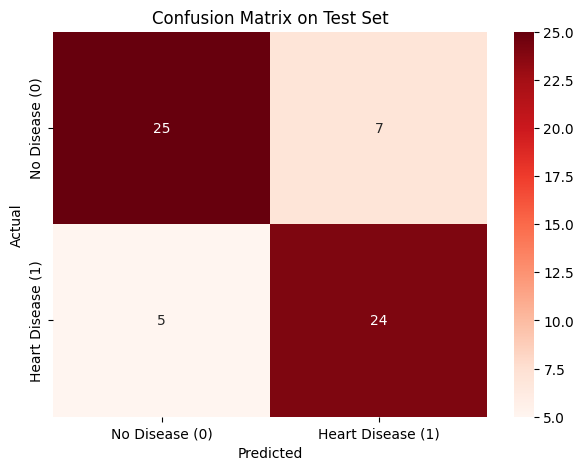

In [23]:
print("\nConfusion Matrix on test set:")
print(confusion_matrix(y_test, y_test_pred))

test_cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['No Disease (0)', 'Heart Disease (1)'], yticklabels=['No Disease (0)', 'Heart Disease (1)'])
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
test_report = classification_report(y_test, y_test_pred, target_names=['No Disease (0)', 'Heart Disease (1)'])
print("\nClassification Report on Test Set:")
print(test_report)


Classification Report on Test Set:
                   precision    recall  f1-score   support

   No Disease (0)       0.83      0.78      0.81        32
Heart Disease (1)       0.77      0.83      0.80        29

         accuracy                           0.80        61
        macro avg       0.80      0.80      0.80        61
     weighted avg       0.81      0.80      0.80        61



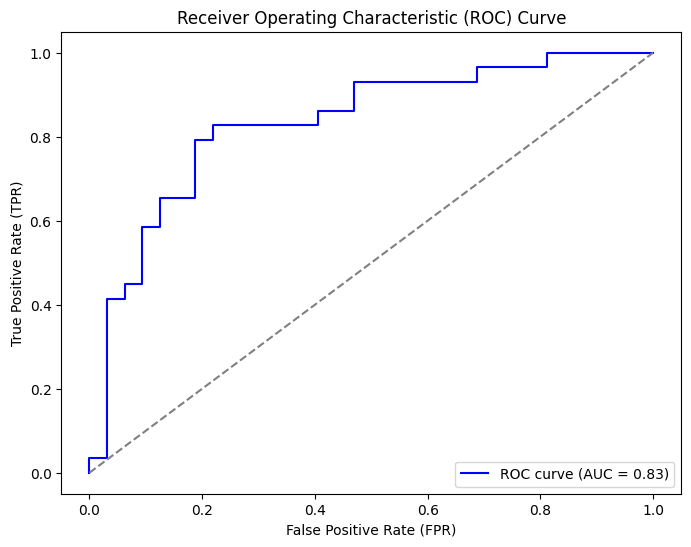

AUC Score: 0.83


In [26]:
# Make predictions on the test set (probabilities)
y_test_prob = log_reg_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (heart disease)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)  # Calculate the AUC score

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print(f"AUC Score: {roc_auc:.2f}")

In [27]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(log_reg_model, 'log_reg_model.pkl')

['log_reg_model.pkl']